In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTTools import get_subHn_by_semantic_boundary
import os

from IPython.display import Image, display

parser = load_parser()

In [2]:
def extract_unique_vertices(hn_def):
    new_hn_def = ""

    for line in hn_def.split("\n"):
        newline = line.replace(":", "-").replace("/", "-").replace("{}", "-").replace(" ", "").replace(";", "; R; ").replace(",", ", ") + "\n"
        new_hn_def += newline
        
    return new_hn_def

In [11]:
def get_hns(directory):
    new_hn = ""
    
    for i, filename in enumerate(os.listdir(directory)):
        fname = os.path.join(directory, filename)
        
        if os.path.isfile(fname):
            with open(fname) as f:
                lines = f.readlines()
                new_hn += extract_unique_vertices(' '.join(lines))

    return new_hn

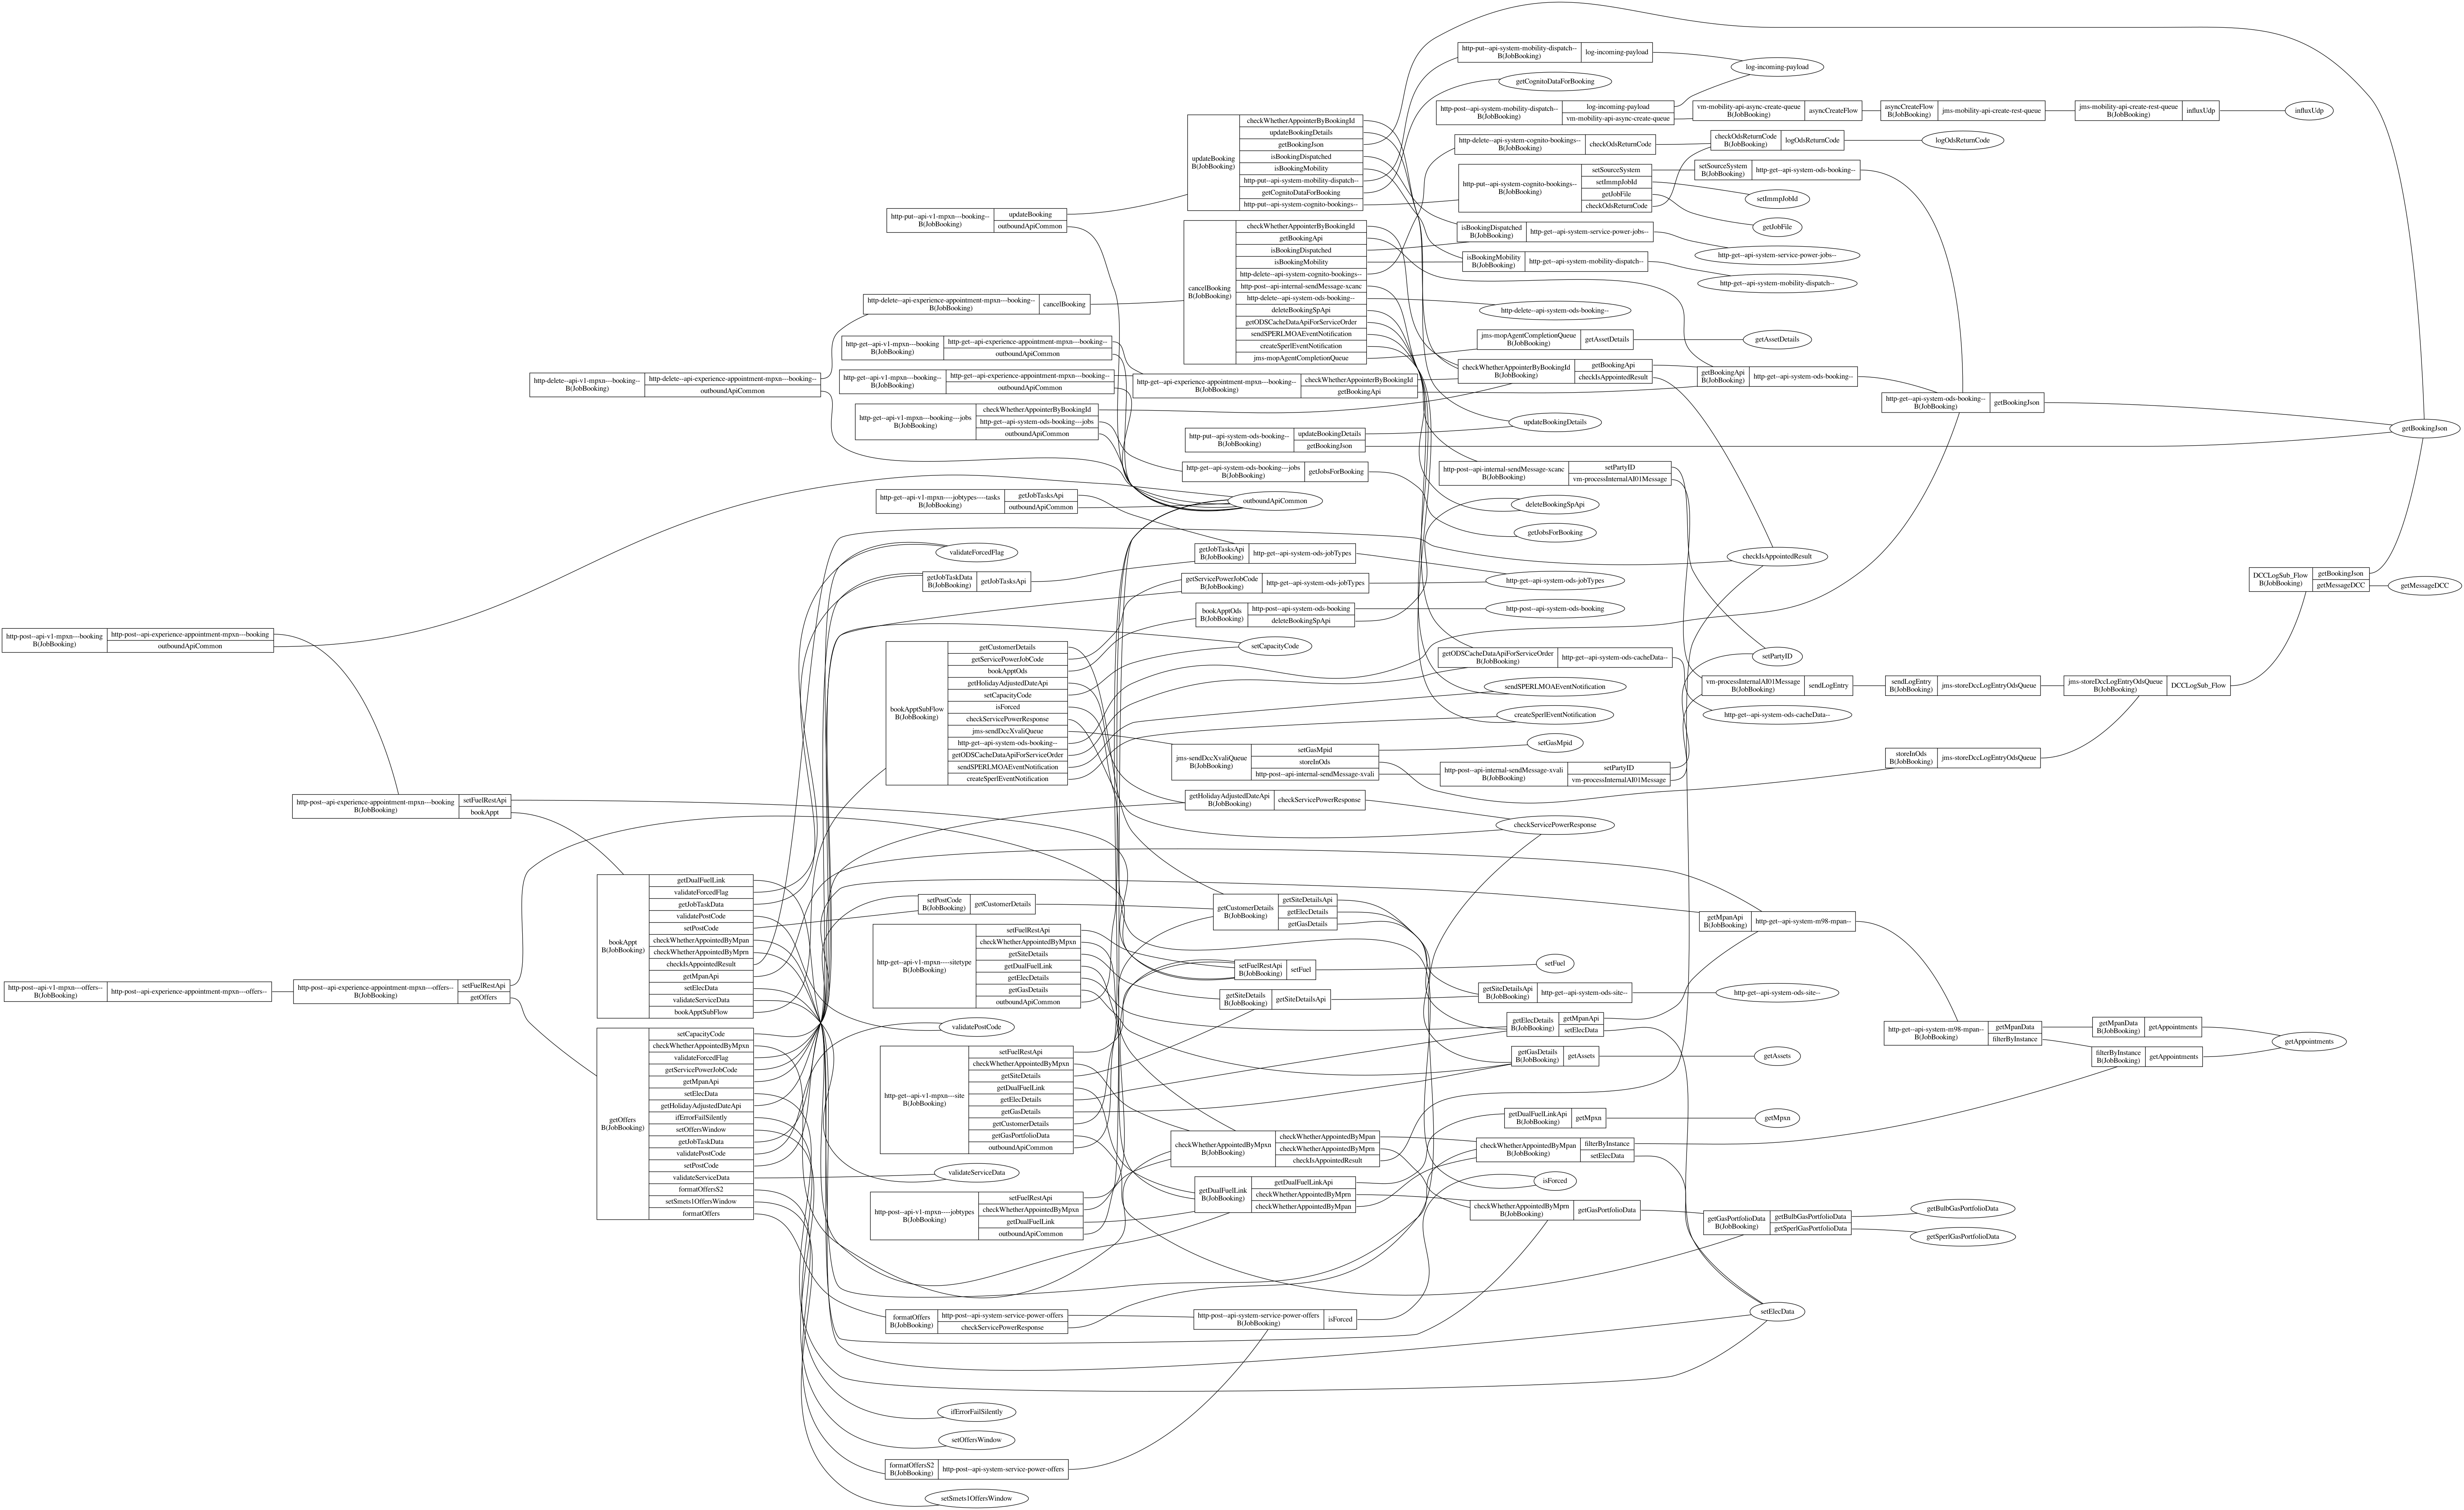

In [27]:
job_booking_hn = Hypernetwork()

# print(get_hns("data/jb_richard"))
compile_hn(job_booking_hn, parser, get_hns("data/jb_richard"))

draw_hn(job_booking_hn, fname="pictures/job_booking", view=False, direction="LR", show_rel=False)
Image(filename='pictures/job_booking.png', width=2000, height=400)

In [22]:
def map_down(hn, node):
    res_hn = Hypernetwork()
    
    def _down(_node):
        hs = hn.hypernetwork[_node]

        for _vertex in hs.simplex:
            _down(_vertex)
        
        res_hn.insert(vertex=hs.vertex, hstype=hs.hstype, simplex=hs.simplex, B=hs.B)
            
    _down(node)
    
    return res_hn

In [39]:
def map_up(hn, node, with_children=True):
    res_hn = Hypernetwork()
    
    def _down(_node):
        hs = hn.hypernetwork[_node]

        for _vertex in hs.simplex:
            _down(_vertex)
        
        res_hn.insert(vertex=hs.vertex, hstype=hs.hstype, simplex=hs.simplex, B=hs.B)

    def _up(_node):
        hs = hn.hypernetwork[_node]

        for _vertex in hs.partOf:
            _up(_vertex)
    
        if with_children:
            _down(_node)

        res_hn.insert(vertex=hs.vertex, hstype=hs.hstype, simplex=hs.simplex, B=hs.B)
        
    _up(node)
    
    return res_hn

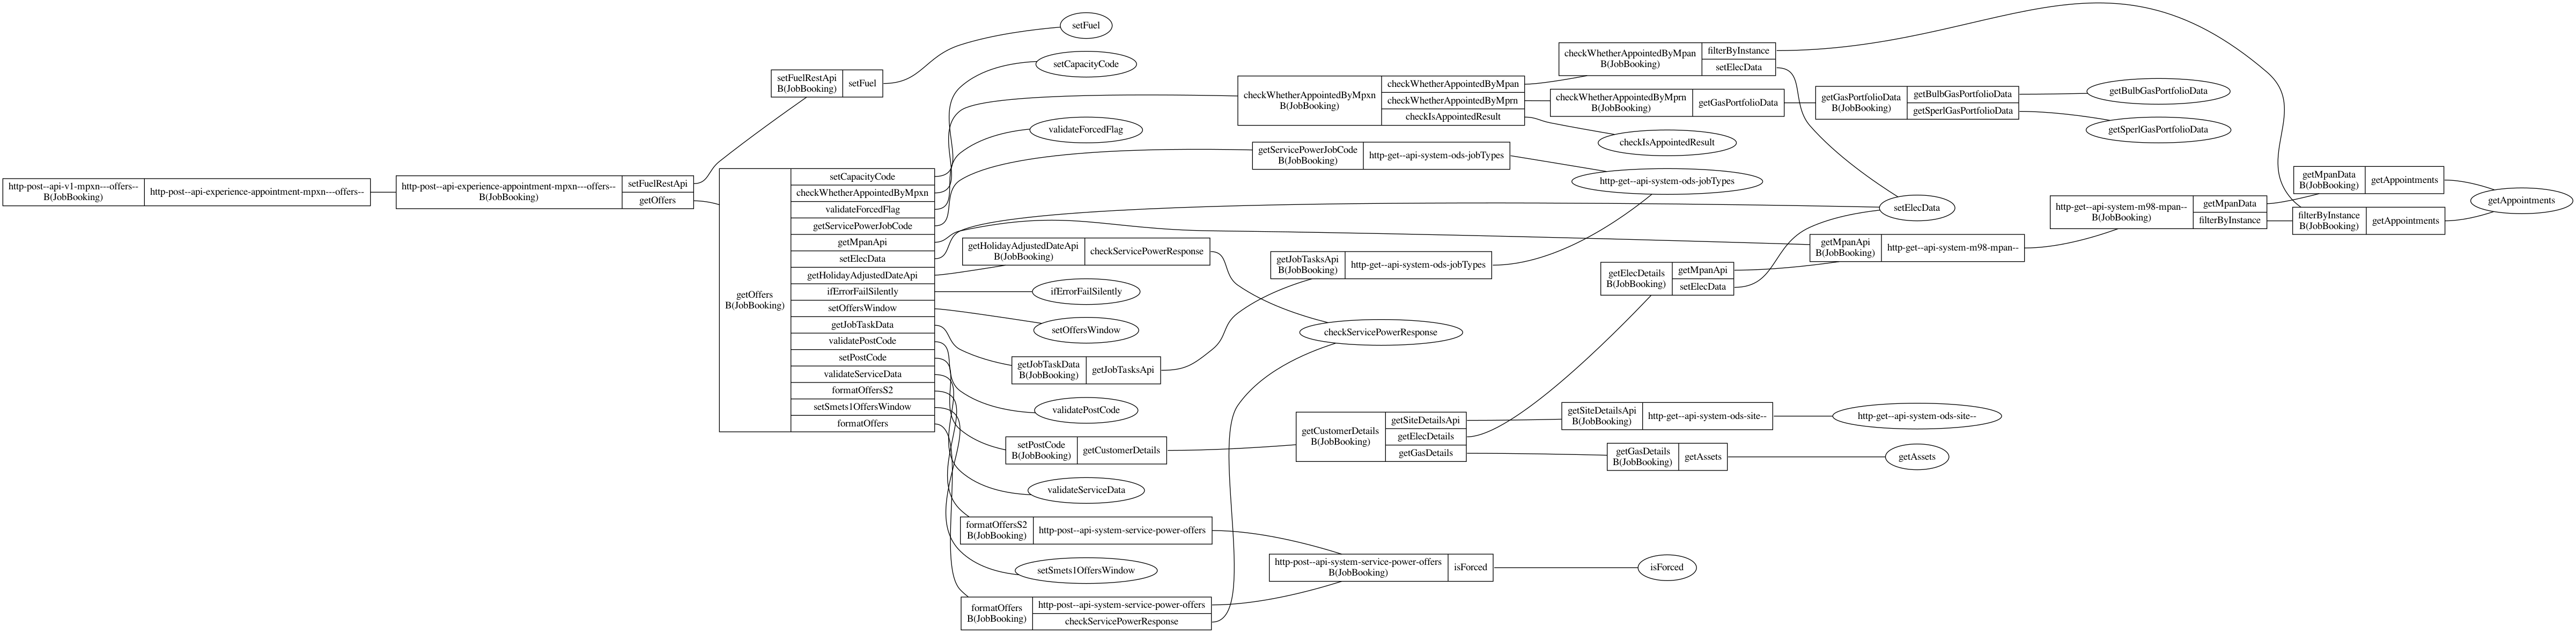

In [40]:
new_hn = map_down(job_booking_hn, "http-post--api-v1-mpxn---offers--")

draw_hn(new_hn, fname="pictures/http-post--api-v1-mpxn---offers--", view=False, direction="LR", show_rel=False)
Image(filename='pictures/http-post--api-v1-mpxn---offers--.png', width=2000, height=400)

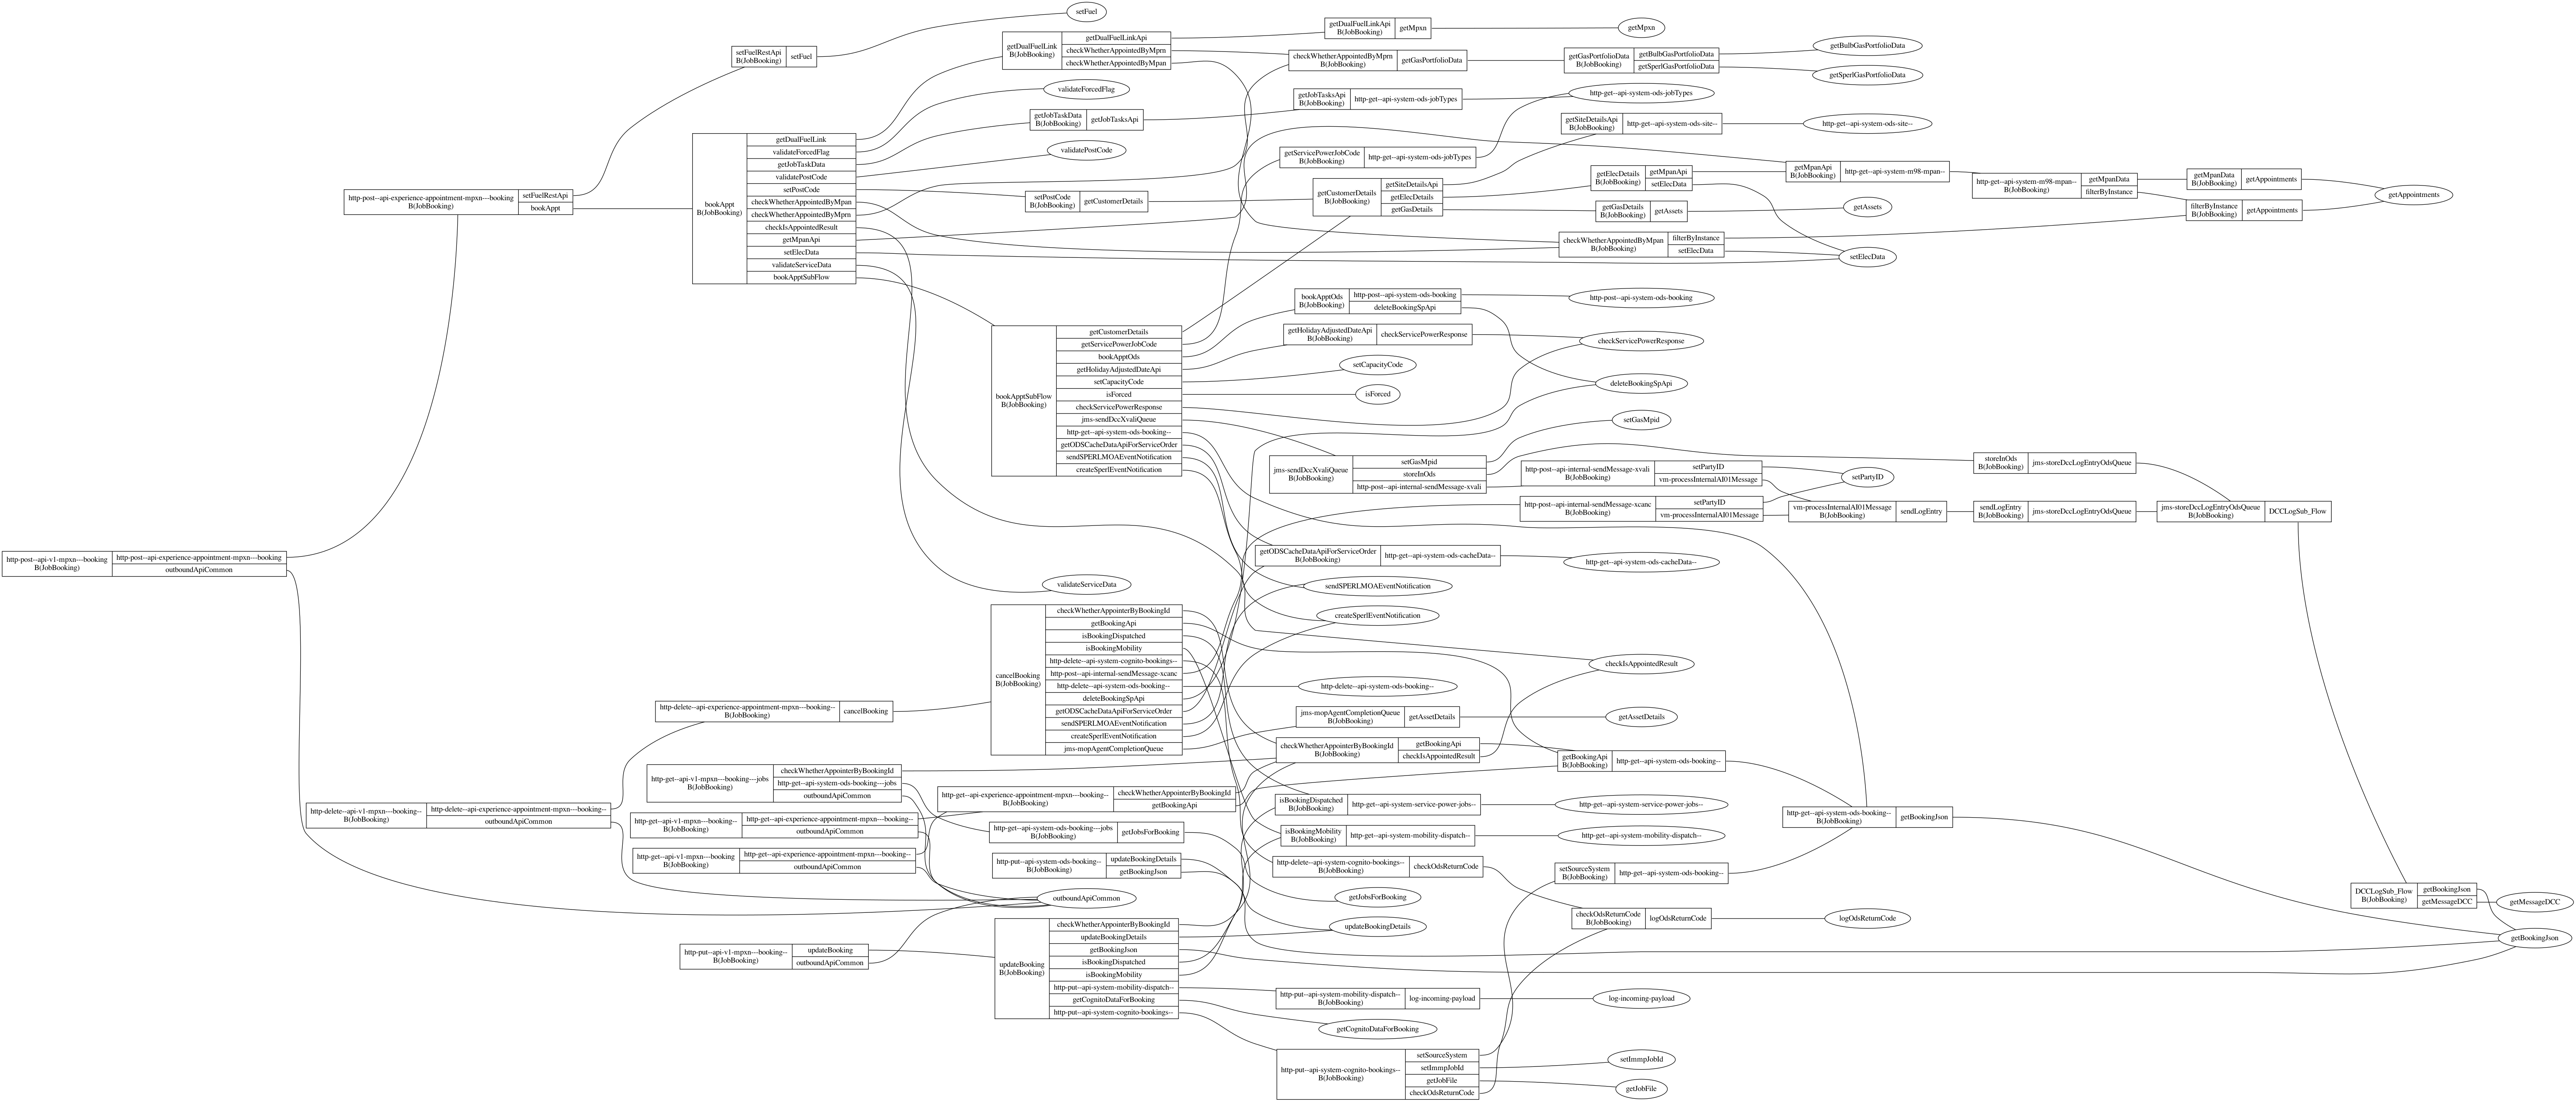

In [43]:
new_hn = map_up(job_booking_hn, "getBookingJson")

draw_hn(new_hn, fname="pictures/getBookingJson", view=False, direction="LR", show_rel=False)
Image(filename='pictures/getBookingJson.png', width=2000, height=400)